### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

### Loading Data

In [2]:
# reading from file
wine_data = pd.read_csv('winedata.csv', delimiter=',')
labels = pd.read_csv('winelabels.csv', delimiter=',')

# merging the data and labels
wine_data = wine_data.merge(labels, left_index=True, right_index=True)

wine_data


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,NaN,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,NaN,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


# Data Exploration and Cleaning 

1. Try to get an idea of what exactly is stored in winedata.csv. Check the size of the dataset (columns and rows) and see if you can find out more about the columns and its values

2. Call the describe() method of your DataFrame. What do you see?

3. Check for missing values (NaNs), calculate their occurences and treat missing values correctly according to one of the methods shown to you in the lecture of DAPIL. Be prepared to defend your choice!


#### Checking basic info in dataset

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_acid            178 non-null    float64
 2   Ash                   173 non-null    float64
 3   Alcalinity_of_ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280315              178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Label                 178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine_data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline,Label
count,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.362659,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.949438
std,0.811827,1.117146,0.276332,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775854
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.550000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
# chceck if there are missing values
wine_data.isnull().sum()

Alcohol                 0
Malic_acid              0
Ash                     5
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280315                0
Proline                 0
Label                   0
dtype: int64

#### Replecing NaN values by class mean

In [6]:
# check means for each class
means = wine_data['Ash'].groupby(wine_data['Label']).mean()

# means for each class
ash_0 = means[0]
ash_1 = means[1]
ash_2 = means[2]

# copy the data
wine_data_copy = wine_data.copy()

# show rows with missing data
wine_data[wine_data.isnull().any(axis=1)]


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline,Label
2,13.16,2.36,NaN,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,NaN,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
6,14.39,1.87,NaN,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,NaN,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
9,13.86,1.35,NaN,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


In [7]:
# fill missing values with means for each class
wine_data_copy['Ash'] = wine_data_copy['Ash'].fillna(wine_data_copy['Label'].map({0: ash_0, 1: ash_1, 2: ash_2}))

# check if there are missing values
wine_data_copy.isnull().sum()

Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280315                0
Proline                 0
Label                   0
dtype: int64

In [8]:
wine_data.head(10)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,NaN,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,NaN,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,14.39,1.87,NaN,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,NaN,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,13.86,1.35,NaN,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


In [9]:
wine_data_copy.head(10)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline,Label
0,14.23,1.71,2.430000,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.140000,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.450566,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.450566,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.870000,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.450000,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,14.39,1.87,2.450566,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,2.450566,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,14.83,1.64,2.170000,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,13.86,1.35,2.450566,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


# Apply and Visualize Normalization 

One technique often used in data preprocessing, especially when dealing with features in differing value ranges, is normalization. Through normalization, differences in value ranges for multiple columns in a data set can be compensated by (e.g.) transforming each feature in such a way that its mean is 0 with standard deviation 1. While this sounds difficult, it is actually pretty easy to do, and we’ll use scikit-learn’s StandardScaler for it. So in short:

1. Use seaborn’s boxplot() function before applying normalization on your cleaned data set

2. Transform the data by correctly applying the StandardScaler

3. Redraw the boxplot and be prepared to talk about the differences you can make out!


In [10]:
def format_plot(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


def create_boxplot(dataframe, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe)
    plt.xticks(rotation=65)
    format_plot('Features', 'Values', title)
    plt.show()


def create_violin(dataframe, title):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=dataframe)
    plt.xticks(rotation=65)
    format_plot('Features', 'Values', title)
    plt.show()


def creare_combined_violin_boxplot(dataframe, title):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=dataframe)
    plt.xticks(rotation=65)
    format_plot('Features', 'Values', f'Boxplot of {title}')

    plt.subplot(1, 2, 2)
    sns.violinplot(data=dataframe)
    plt.xticks(rotation=65)
    format_plot('Features', 'Values', f'Violin of {title}')
    plt.tight_layout()
    plt.show()

#### Boxplot on clear dataset

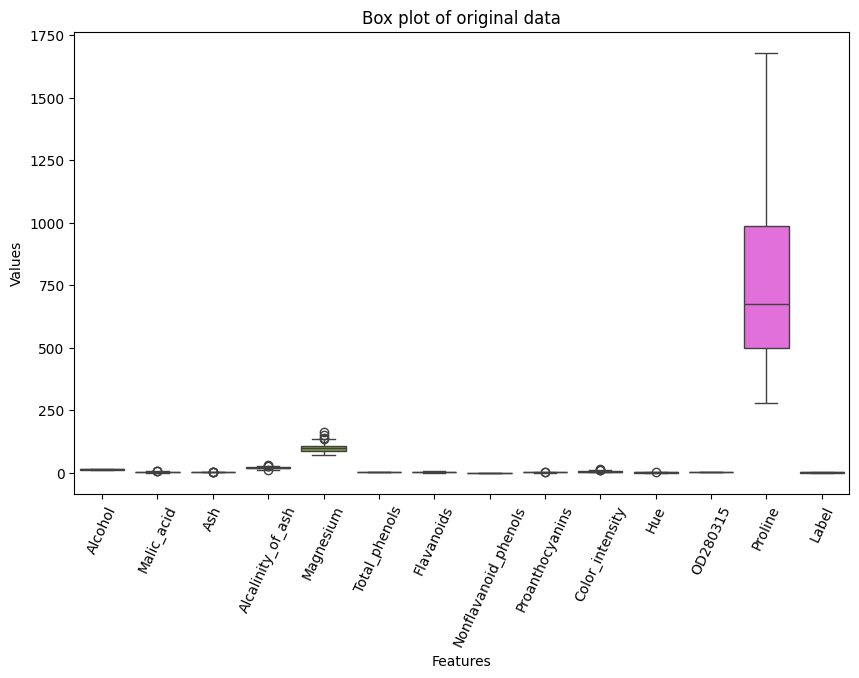

In [11]:
create_boxplot(wine_data, 'Box plot of original data')

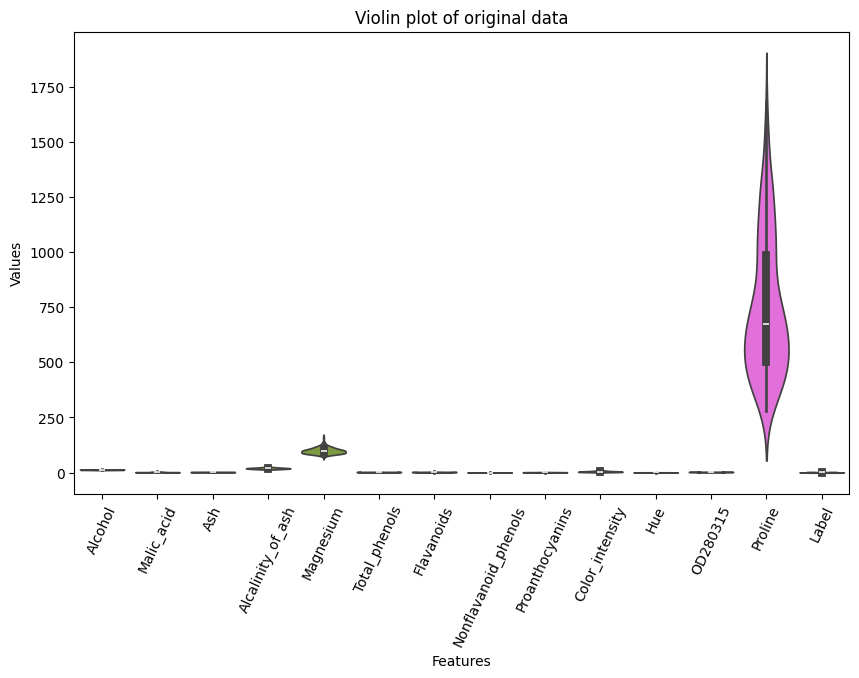

In [12]:
create_violin(wine_data, 'Violin plot of original data')

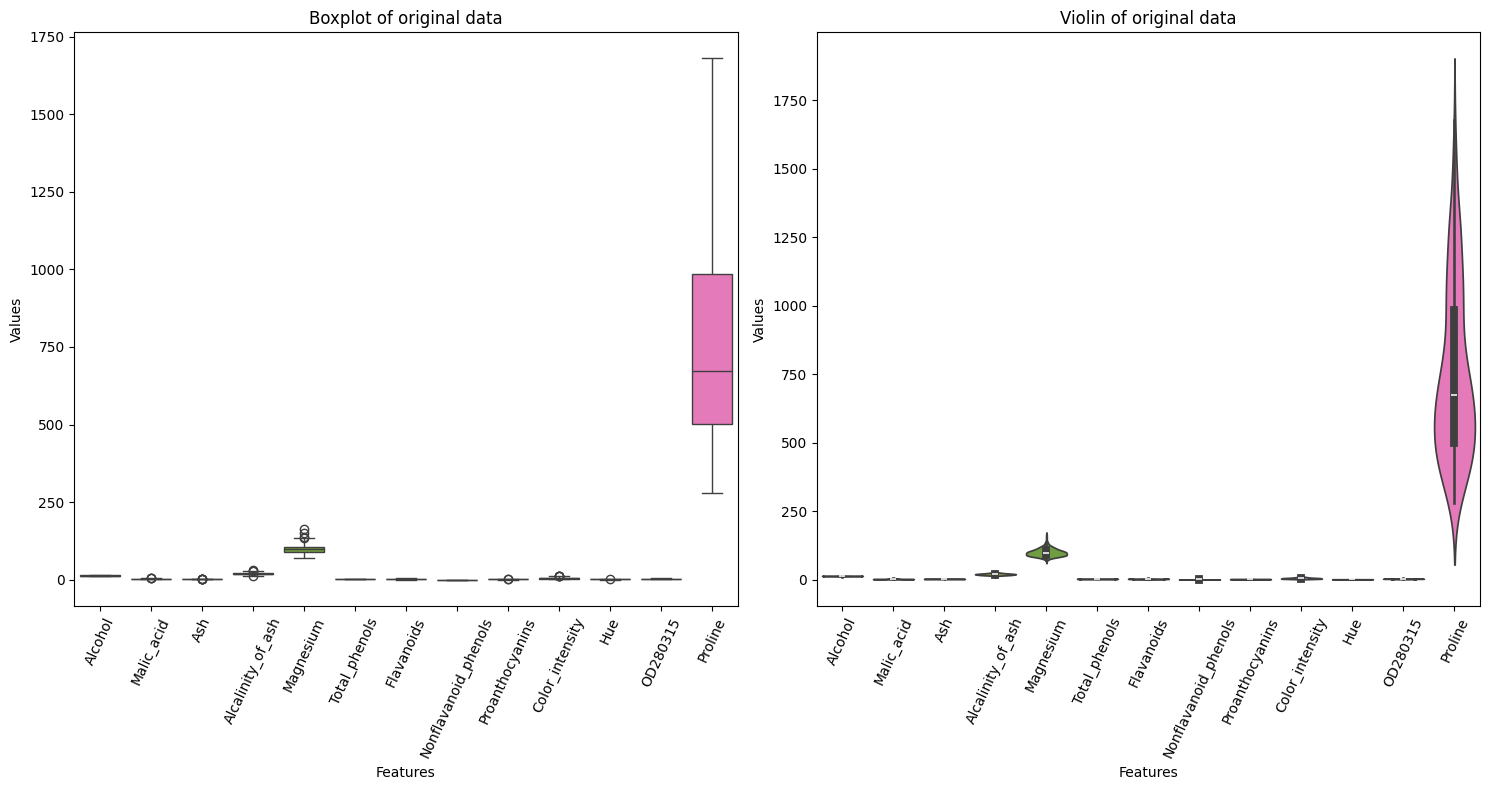

In [13]:
creare_combined_violin_boxplot(wine_data_copy.drop(columns='Label'), 'original data')

#### Scaling the data

In [14]:
scaled_data = StandardScaler().fit_transform(wine_data_copy.drop('Label', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=wine_data_copy.columns[:-1])
scaled_data

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
0,1.518613,-0.562250,0.238479,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827609,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,0.314084,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.314084,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.855993,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.312003,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.422288,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.386469,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.017909,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


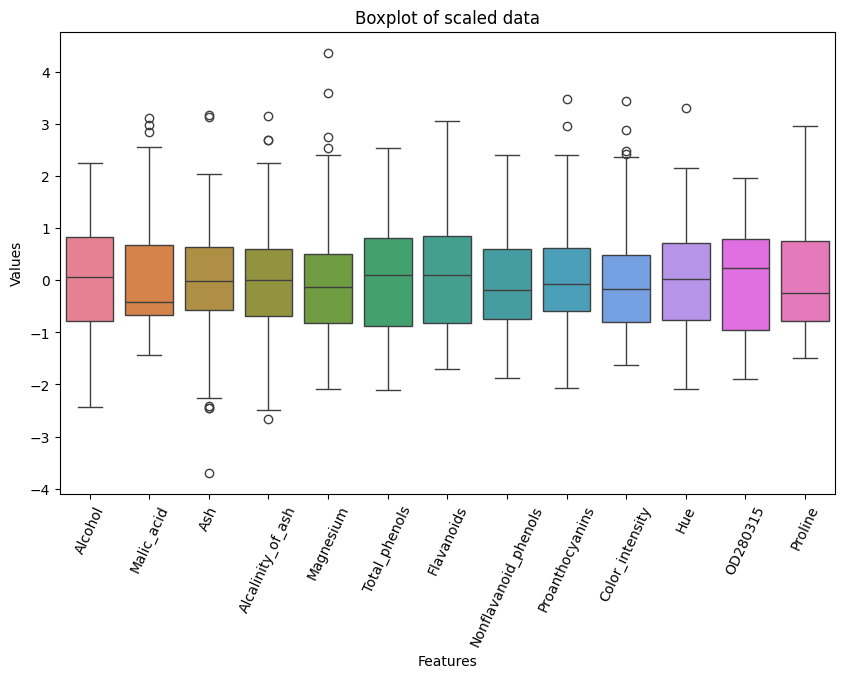

In [15]:
create_boxplot(scaled_data, "Boxplot of scaled data")

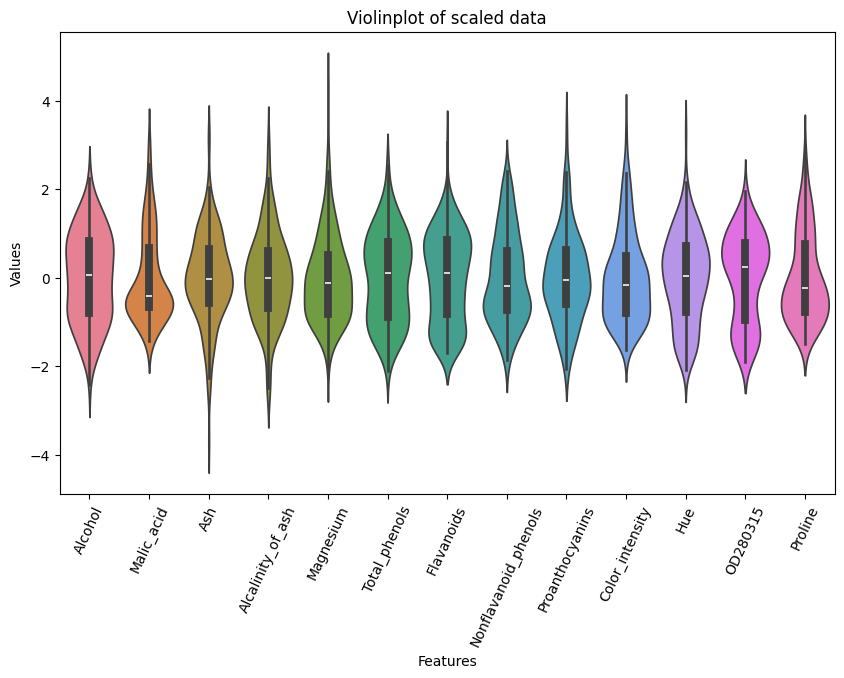

In [16]:
create_violin(scaled_data, "Violinplot of scaled data")

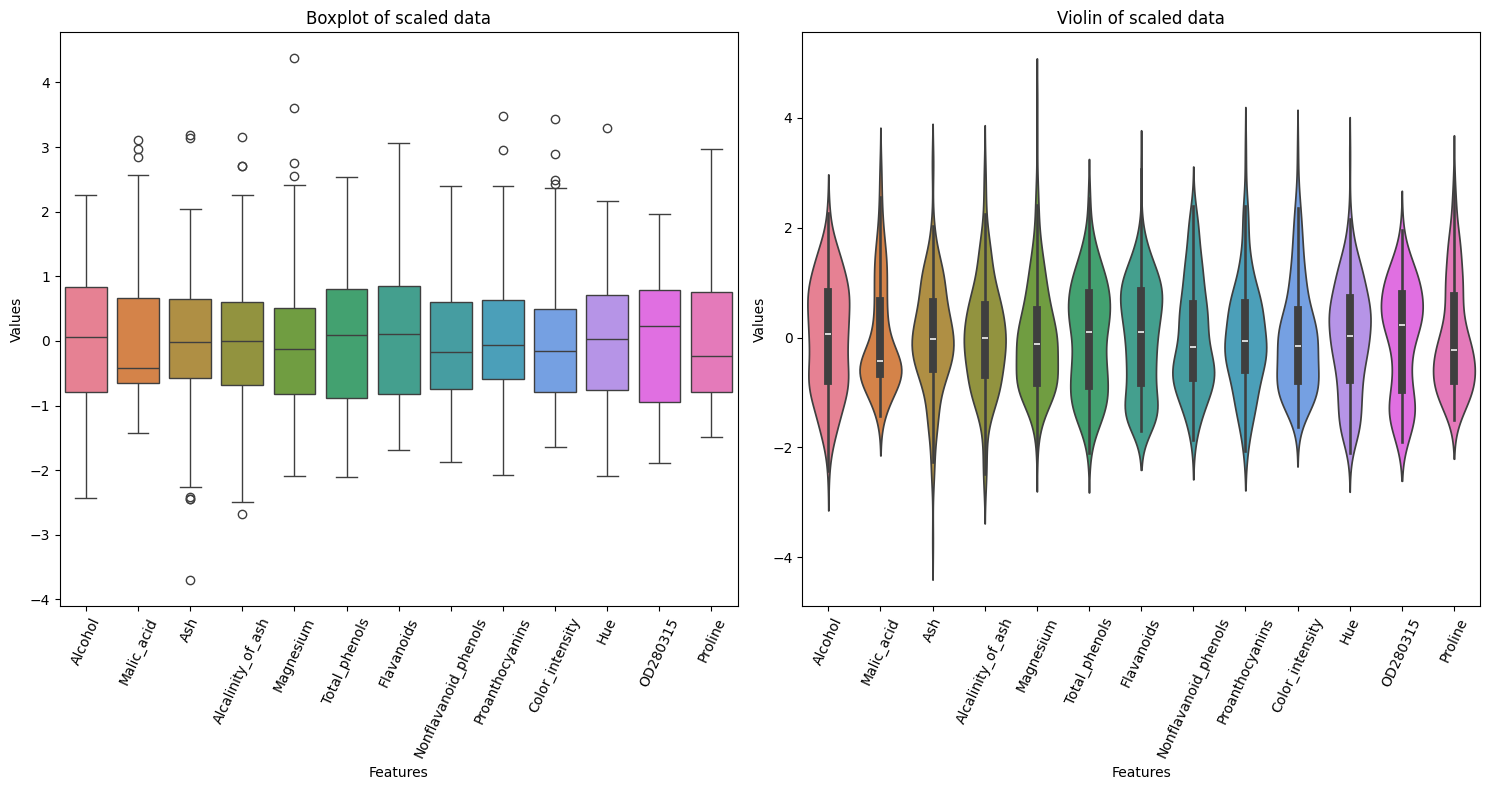

In [17]:
creare_combined_violin_boxplot(scaled_data, 'scaled data')

#### Scaling with using aTan

In [18]:
atan_scaled_data = scaled_data.copy()
atan_scaled_data = np.arctan(atan_scaled_data) / (np.pi / 2)
atan_scaled_data

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
0,0.629281,-0.326076,0.149037,-0.549662,0.693481,0.433031,0.510893,-0.371193,0.564130,0.156987,0.221214,0.684222,0.504114
1,0.153733,-0.294868,-0.440127,-0.756956,0.011550,0.329162,0.402943,-0.437515,-0.317534,-0.181639,0.245552,0.534141,0.488742
2,0.123754,0.013514,0.193740,-0.167135,0.056105,0.433031,0.561738,-0.294355,0.721248,0.167302,0.196183,0.425099,0.604091
3,0.660106,-0.212523,0.193740,-0.433128,0.477234,0.757009,0.619006,-0.494178,0.510072,0.554056,-0.257209,0.553527,0.742360
4,0.183033,0.142524,0.685382,0.270227,0.578270,0.433031,0.372871,0.141981,0.243008,-0.196745,0.221214,0.268986,-0.024100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.458081,0.793534,0.192534,0.186600,-0.204597,-0.495388,-0.610430,0.576415,-0.476982,0.542366,-0.603574,-0.565734,-0.013973
174,0.291768,0.607833,0.254375,0.516285,0.100116,-0.426957,-0.578838,0.319684,-0.195400,0.490235,-0.538672,-0.622796,0.006298
175,0.204503,0.668676,-0.234777,0.095820,0.609906,-0.538757,-0.592899,0.319684,-0.254260,0.731019,-0.646541,-0.622796,0.174142
176,0.131307,0.142524,0.011400,0.095820,0.609906,-0.510543,-0.595164,0.595224,-0.143524,0.682338,-0.638625,-0.605287,0.183500


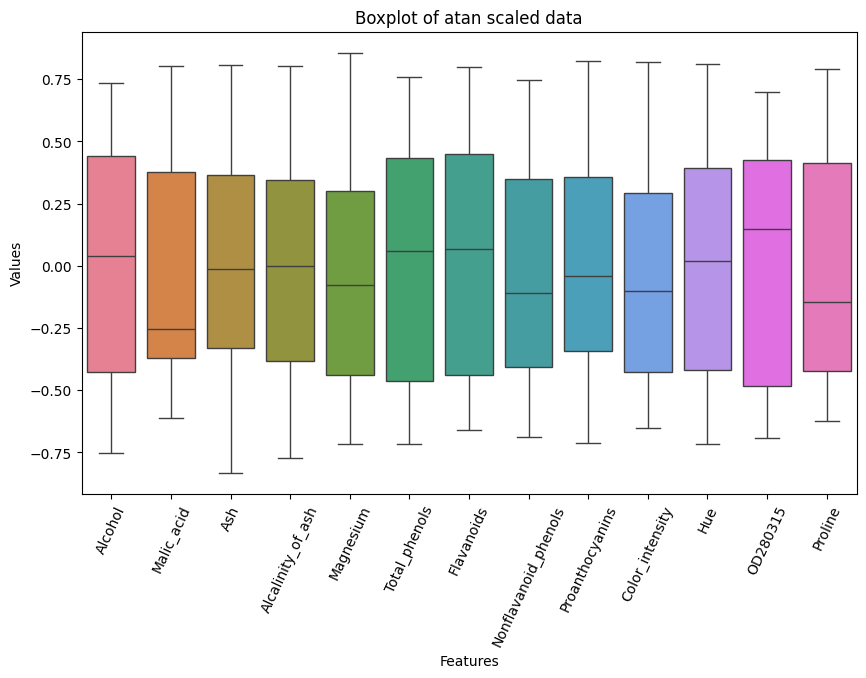

In [19]:
create_boxplot(atan_scaled_data, "Boxplot of atan scaled data")

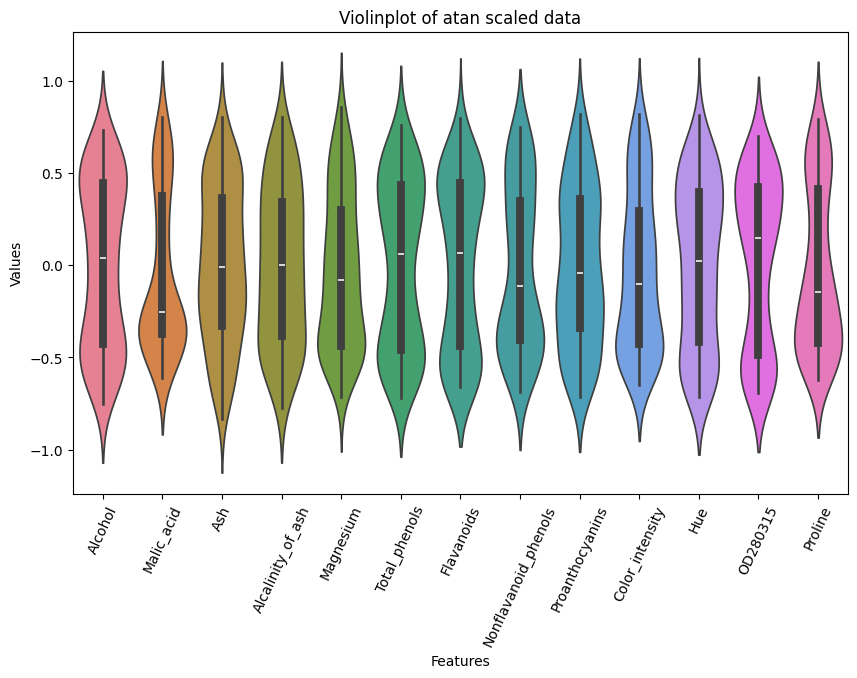

In [20]:
create_violin(atan_scaled_data, "Violinplot of atan scaled data")

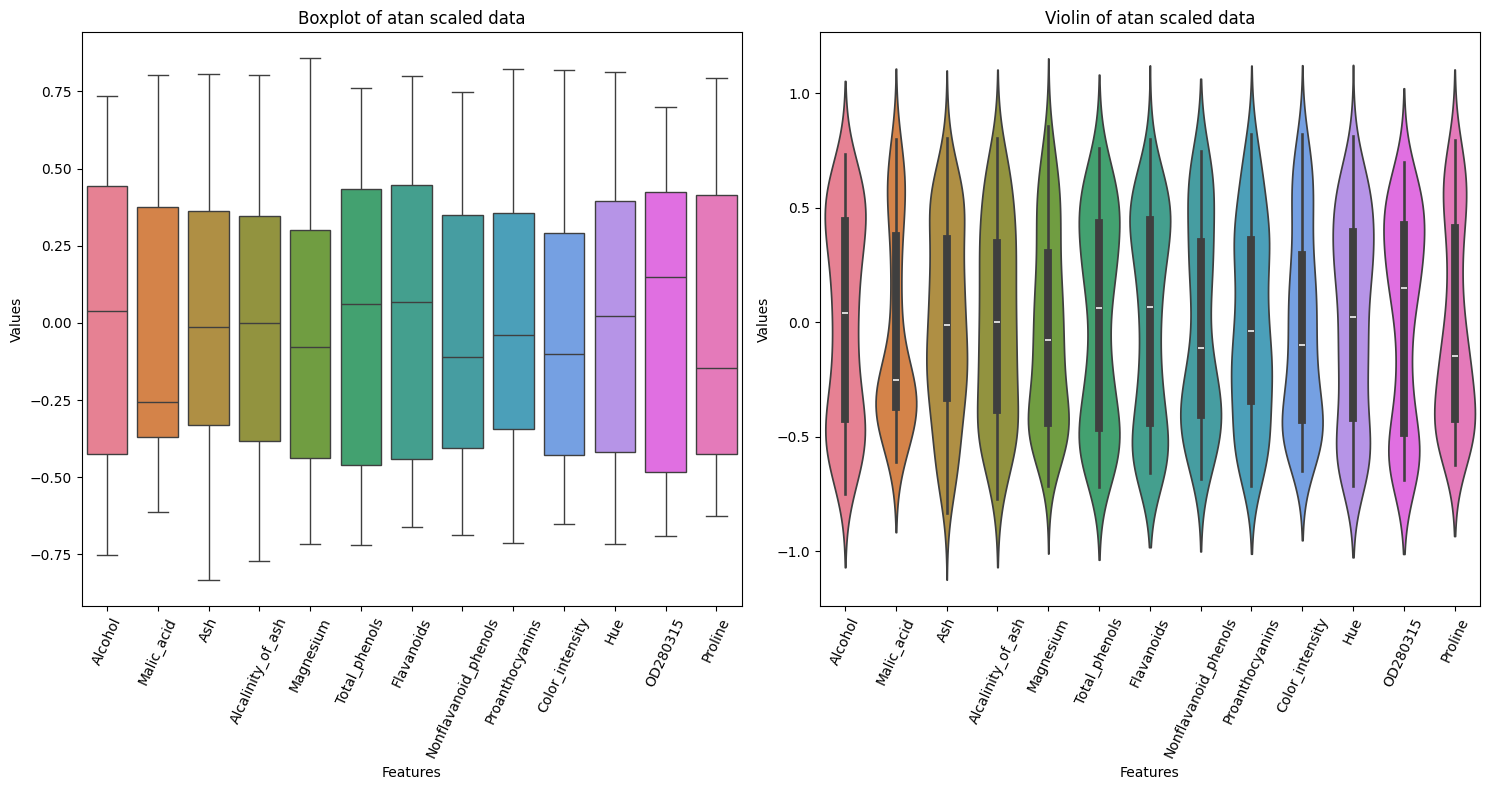

In [21]:
creare_combined_violin_boxplot(atan_scaled_data, 'atan scaled data')

# Apply and Visualize Dimensionality Reduction

## PCA

In [22]:
# I copied this code from my other repository : FHSalzburg-Analytics-And-Knowledge-Discovery

class PCACreator:
    def __init__(self, dataframe: pd.DataFrame, n_dimensions: int = None, standardize: bool = True):
        self.dataframe = dataframe
        self.n_dimensions = n_dimensions
        self.standardize = standardize
        self.pca = PCA(n_components=n_dimensions)
        self.pca_out = None
        self.loadings = None
        self.pca_scores = None

    # interpolate missing data
    def clean_data(self):
        self.dataframe = self.dataframe.interpolate()

    def standardize_data(self):
        standardized_data = StandardScaler().fit_transform(self.dataframe)
        self.dataframe = pd.DataFrame(standardized_data, columns=self.dataframe.columns)

    # perform a PCA on the data
    def perform_pca(self):
        self.clean_data()
        if self.standardize:
            self.standardize_data()
        self.pca_scores = self.pca.fit_transform(self.dataframe)
        self.pca_out = self.pca.fit(self.dataframe)
        return self.pca_out

    def get_exp_variance(self):
        if self.pca_out is None:
            self.perform_pca()
        return self.pca_out.explained_variance_ratio_

    def get_loadings(self):
        if self.pca_out is None:
            self.perform_pca()

        principal_components = self.pca_out.components_
        pc_list = ["PC" + str(i) for i in range(1, self.pca_out.n_components_ + 1)]
        loadings_df = pd.DataFrame(principal_components.T, columns=pc_list, index=self.dataframe.columns)
        self.loadings = loadings_df
        return loadings_df

    def get_cumulative_variance(self):
        return np.cumsum(self.get_exp_variance())

    def plot_biplot(self, colorlist=None):
        if self.pca_out is None:
            self.perform_pca()

        loadings = self.pca_out.components_
        pca_scores = self.pca_scores
        var1 = round(self.pca_out.explained_variance_ratio_[0] * 100, 2)
        var2 = round(self.pca_out.explained_variance_ratio_[1] * 100, 2)

        # Plot using bioinfokit
        cluster.biplot(
            cscore=pca_scores,
            loadings=loadings,
            labels=self.dataframe.columns.values,
            var1=var1,
            var2=var2,
            show=True,
            dim=(10, 8),
            colorlist=colorlist
        )

    def plot_corr_plot(self):
        if self.loadings is None:
            self.get_loadings()
        sns.heatmap(self.loadings, annot=True, cmap='coolwarm', center=0)
        plt.title("PCA Loadings")
        plt.show()

    def assess_dimensions(self, variance_threshold=0.85):
        explained_variance = self.get_exp_variance()
        cumulative_variance = self.get_cumulative_variance()
        num_needed_components = np.argmax(cumulative_variance >= variance_threshold) + 1
        return num_needed_components, cumulative_variance, explained_variance

    def plot_cumulative_variance_threshold(self, variance_threshold=0.85, title="Cumulative Explained Variance"):
        num_needed_components, cumulative_variance, explained_variance = self.assess_dimensions(variance_threshold)
        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Explained Variance per Component')
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
        plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold * 100}% Variance Threshold')
        plt.axvline(x=num_needed_components, color='g', linestyle='--', label=f'{num_needed_components} Components')
        plt.title(title)
        plt.xlabel("Number of Principal Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.legend()
        plt.grid()
        plt.show()


    def plot_scree_plot(self):
        self.perform_pca()
        pc_list = ["PC" + str(i) for i in range(1, self.pca_out.n_components_ + 1)]
        cluster.screeplot(obj=[pc_list, self.pca_out.explained_variance_ratio_], show=True, dim=(10, 8))

    # I added this function to my class (you won't find it in the original class)
    def plot_scatter(self, color):
        if self.pca_scores is None:
            self.perform_pca()

        plt.figure(figsize=(10, 6))


        unique_classes = np.unique(color)
        scatter_plots = []

        # plot each class separately for legend
        for class_label in unique_classes:
            class_mask = (color == class_label)
            scatter = plt.scatter(
                self.pca_scores[class_mask, 0],
                self.pca_scores[class_mask, 1],
                label=str(class_label),
                cmap='viridis'
            )
            scatter_plots.append(scatter)

        plt.xlabel(f"PC1 : {round(self.pca_out.explained_variance_ratio_[0] * 100, 2)}%")
        plt.ylabel(f"PC2 : {round(self.pca_out.explained_variance_ratio_[1] * 100, 2)}%")
        plt.title("PCA Scatter Plot")


        plt.legend(title="Classes")
        plt.show()


#### 1. Without standarization

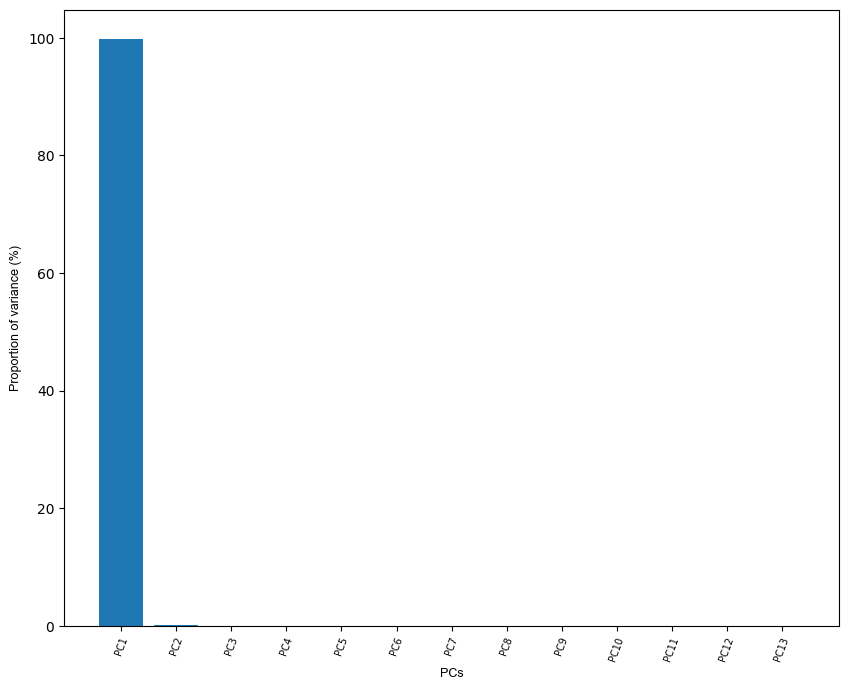

In [23]:
wine_data_nst = wine_data_copy.drop(columns='Label')

# create pcacreator object
pca_wine_nst = PCACreator(wine_data_nst, standardize=False)

# perform pca
pca_wine_nst.perform_pca()

# plot scree plot
pca_wine_nst.plot_scree_plot()

In [24]:
# get loadings
pca_wine_nst.get_loadings()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.001659,0.001203,0.016883,0.141448,-0.020371,0.194148,0.922987,0.285657,-0.086636,-0.002114,-0.016637,-0.015348,0.008259
Malic_acid,-0.000681,0.002155,0.122003,0.160385,0.612819,0.742569,-0.150053,-0.064985,-0.015707,-0.018713,-0.021238,0.067197,-0.011373
Ash,0.000185,0.004538,0.051649,-0.008989,-0.021564,0.040849,0.047896,-0.152919,-0.074895,-0.084906,0.952994,-0.137211,-0.171981
Alcalinity_of_ash,-0.004671,0.026450,0.938594,-0.331055,-0.064281,-0.023994,0.031385,0.015303,-0.002010,0.003418,-0.052387,0.005626,0.001777
Magnesium,0.017868,0.999344,-0.029776,-0.005395,0.006152,-0.001918,0.001794,-0.003545,0.001970,-0.000050,-0.002986,0.000631,0.002272
Total_phenols,0.000990,0.000878,-0.040487,-0.074579,-0.315266,0.278697,-0.020151,-0.177289,-0.255321,0.847319,0.006229,0.004192,-0.026443
Flavanoids,0.001567,-0.000052,-0.085450,-0.169075,-0.524799,0.433551,-0.038776,-0.248285,-0.377851,-0.520222,-0.134090,-0.036770,0.069604
Nonflavanoid_phenols,-0.000123,-0.001354,0.013511,0.010805,0.029645,-0.021960,-0.004619,0.006398,-0.036781,0.037989,0.198271,0.146192,0.966849
Proanthocyanins,0.000601,0.005004,-0.024664,-0.050119,-0.251159,0.241851,-0.310304,0.869726,0.050093,0.009581,0.139423,-0.014283,-0.018034
Color_intensity,0.002327,0.015100,0.291450,0.878873,-0.331710,0.002674,-0.112888,-0.081055,0.099193,-0.023105,-0.010329,0.050524,-0.004485


C:\Users\barte\AppData\Local\Temp\ipykernel_9424\730427435.py:116: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


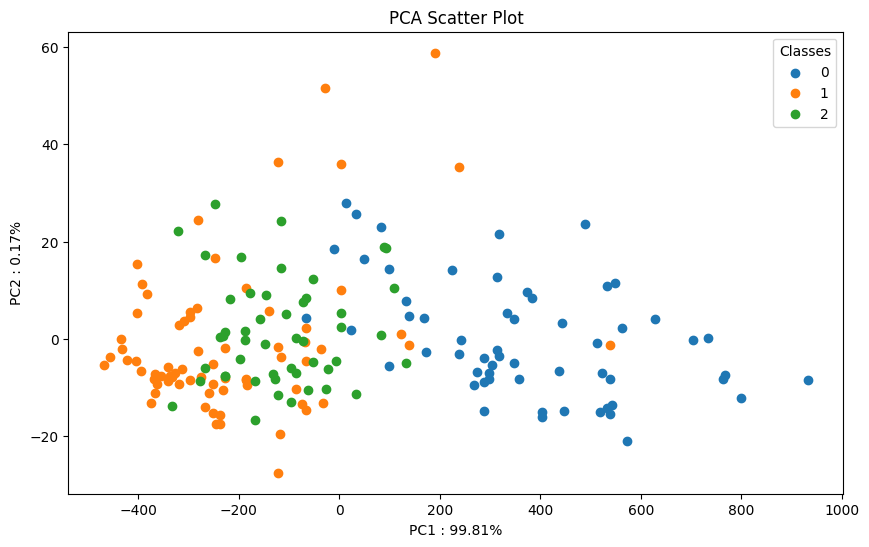

In [25]:
pca_wine_nst.plot_scatter(color=wine_data['Label'])

#### 2. With standarization (StandarScaler)

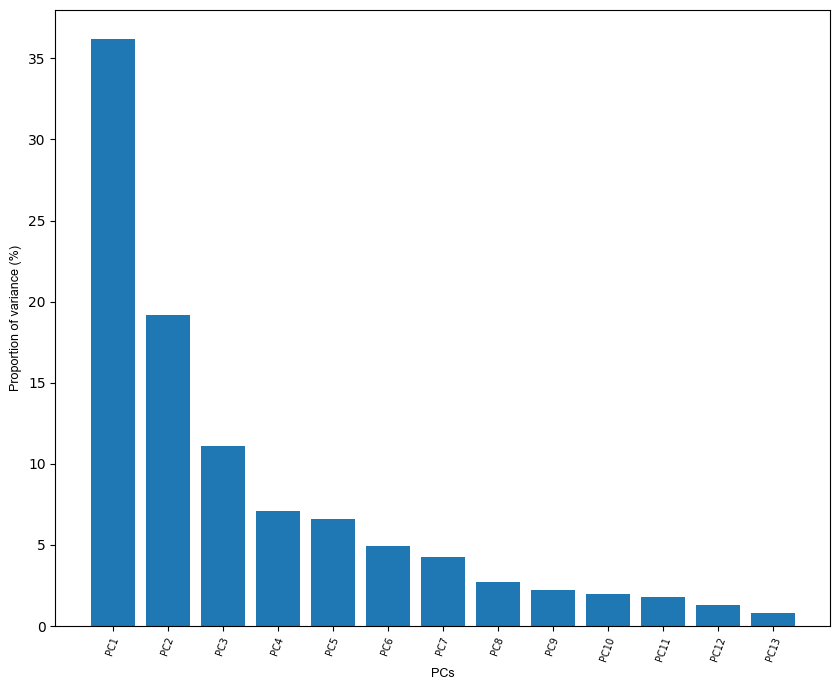

In [26]:
wine_data_st = scaled_data

pca_wine_st  = PCACreator(wine_data_st, standardize=False)

# perform pca
pca_wine_st.perform_pca()

# plot scree plot
pca_wine_st.plot_scree_plot()

In [27]:
# get loadings
pca_wine_st.get_loadings()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.144027,0.484718,-0.204621,-0.020550,-0.266108,-0.215061,-0.051441,0.393802,-0.517942,-0.185452,-0.231861,-0.265619,0.015880
Malic_acid,-0.245378,0.224002,0.086446,0.539233,0.032888,-0.533392,0.423508,0.062267,0.086191,0.303231,0.087763,0.121750,0.025305
Ash,-0.005382,0.313700,0.627875,-0.216071,-0.142248,-0.155466,-0.151973,-0.173568,0.300977,0.050418,-0.497569,-0.053051,-0.139661
Alcalinity_of_ash,-0.239673,-0.011860,0.612037,0.061572,0.067402,0.097060,-0.276636,0.435607,-0.194407,-0.078257,0.478444,-0.053084,0.090257
Magnesium,0.141677,0.299474,0.129985,-0.345524,0.731064,-0.037416,0.323696,-0.158405,-0.267859,-0.067686,0.069006,0.062966,0.056373
Total_phenols,0.394526,0.065845,0.148594,0.196046,-0.150962,0.082595,-0.027915,-0.405142,-0.275536,0.304670,0.333192,-0.300439,-0.463620
Flavanoids,0.422836,-0.002681,0.152539,0.150775,-0.110353,0.017654,-0.060476,-0.187223,-0.043986,0.161673,-0.008786,-0.044026,0.833015
Nonflavanoid_phenols,-0.298681,0.027733,0.168897,-0.204749,-0.496238,0.262615,0.598189,-0.234008,-0.194089,-0.219845,0.105495,0.042758,0.113152
Proanthocyanins,0.313391,0.039269,0.148310,0.401177,0.135503,0.537620,0.365193,0.363723,0.200867,-0.118414,-0.257789,-0.097259,-0.118174
Color_intensity,-0.088972,0.530919,-0.133740,0.063504,-0.078041,0.416108,-0.230979,-0.033892,-0.049864,0.288105,0.051235,0.605264,-0.009696


C:\Users\barte\AppData\Local\Temp\ipykernel_9424\730427435.py:116: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


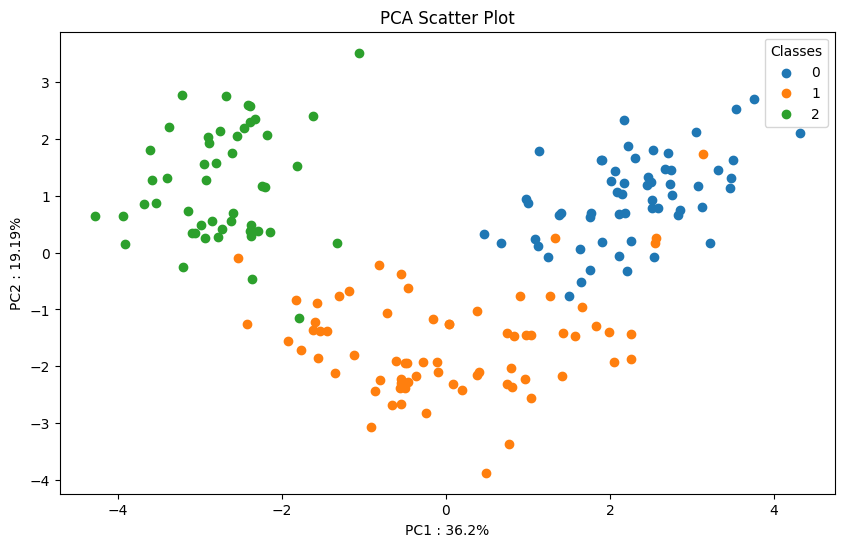

In [28]:
# create scatter plot
pca_wine_st.plot_scatter(color=wine_data_copy['Label'])

#### SKITLEARN

<Axes: xlabel='PC1', ylabel='PC2'>

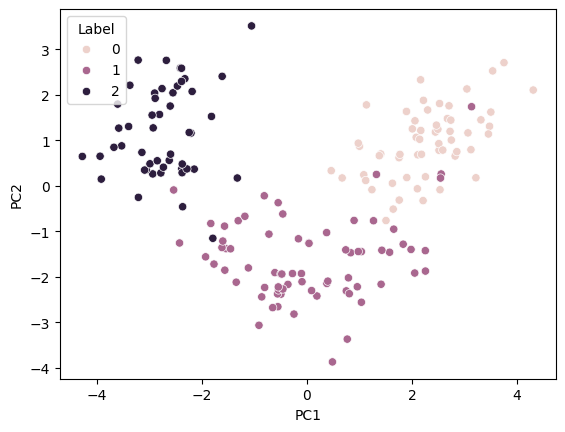

In [29]:
wine_sk = wine_data_copy.copy()
wine_sk.drop('Label', axis=1, inplace=True)

sclaer = StandardScaler
wine_sk = sclaer().fit_transform(wine_sk)

wine_sk = pd.DataFrame(wine_sk, columns=wine_data_copy.columns[:-1])

pca_out = PCA(n_components=2)
pca_scores = pca_out.fit_transform(wine_sk)

pca_scores = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])
sns.scatterplot(data=pca_scores, x='PC1', y='PC2', hue=wine_data_copy['Label'])

#### 3. aTan scaling

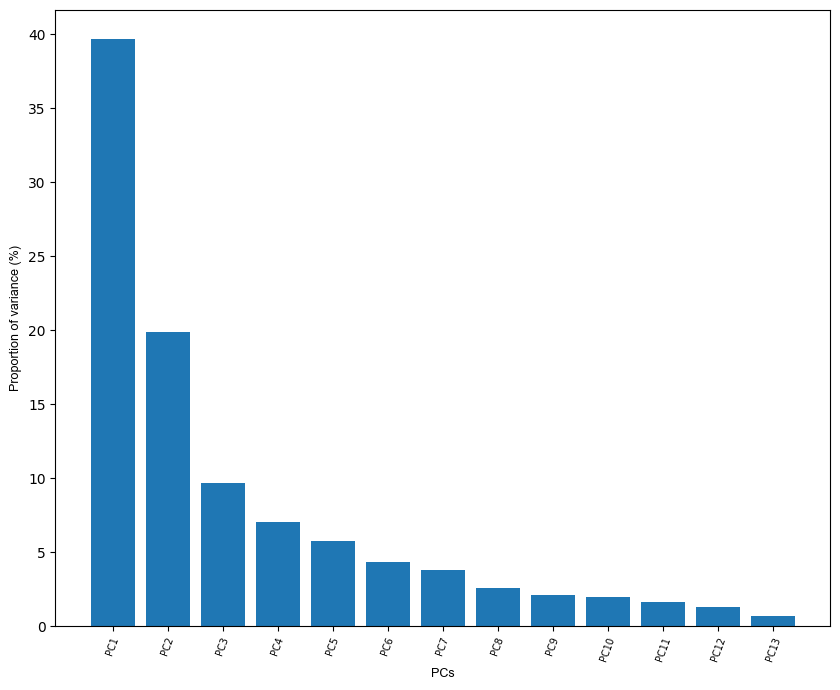

In [30]:
pca_wine_atan = PCACreator(atan_scaled_data, standardize=False)
pca_wine_atan.perform_pca()

pca_wine_atan.plot_scree_plot()

C:\Users\barte\AppData\Local\Temp\ipykernel_9424\730427435.py:116: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


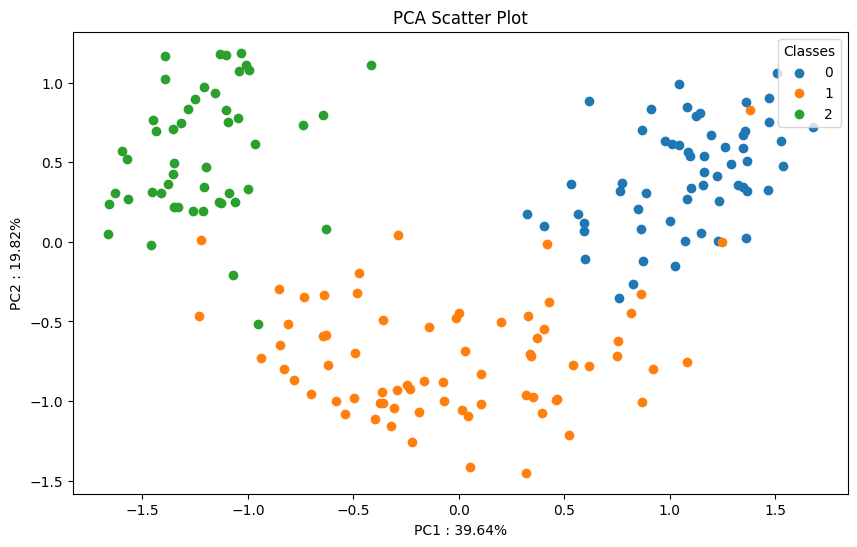

In [31]:
pca_wine_atan.plot_scatter(color=wine_data_copy['Label'])

What we can see in this plots : 
 - without standarization it is hard to cluster wines from distinct groups, we have a lot of overlaping areas
 - scaling helps to reduce overlaping and we can make cluster of distinct class
 - aTan scaling gives us slightly better results, as it has better PCA values

## tSNE

In [32]:
class TSNECreator:
    def __init__(self, dataframe, n_dimensions=2, perplexity=None, learning_rate=None):
        self.dataframe = dataframe
        self.n_dimensions = n_dimensions
        self.perplexity = perplexity
        self.learning_rate = learning_rate
        self.tsne = TSNE(n_components=n_dimensions, perplexity=perplexity, learning_rate=learning_rate, random_state=42, max_iter=1000)
        self.tsne_scores = None


    def perform_tsne(self):
        self.tsne_scores = self.tsne.fit_transform(self.dataframe)
        return self.tsne_scores

    def plot_tsne(self, color):
        if self.tsne_scores is None:
            self.perform_tsne()

        points = self.tsne_scores
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=wine_data['Label'], palette='viridis')
        plt.title("TSNE Scatter Plot")
        plt.show()

#### 1. Without standarization

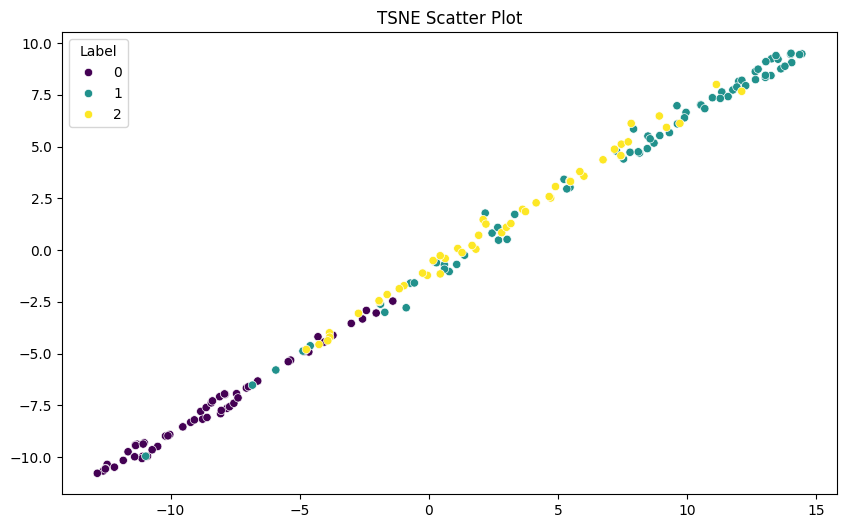

In [33]:
tsne_wine = TSNECreator(wine_data_nst, perplexity=30, learning_rate=200)
tsne_wine.plot_tsne(wine_data['Label'])

#### 2. With standarization (StandardScaler)

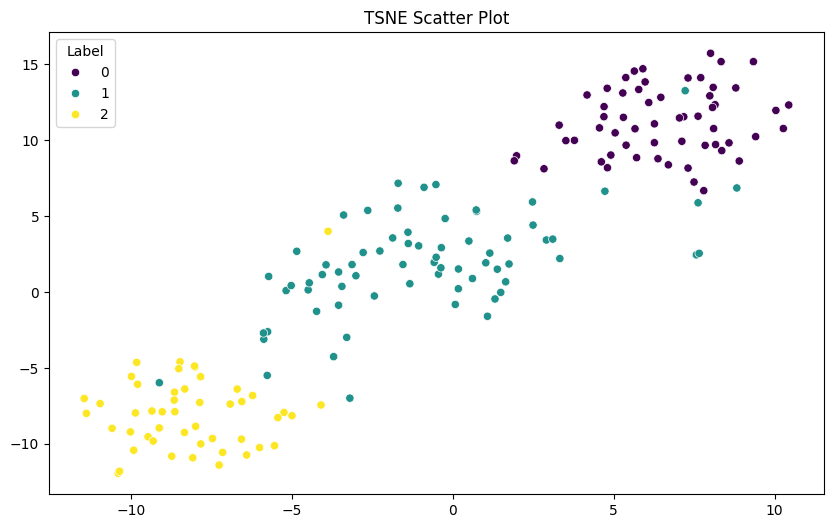

In [34]:
tsne_wine_st = TSNECreator(wine_data_st, perplexity=30, learning_rate=200)
tsne_wine_st.plot_tsne(wine_data['Label'])

#### 3. With aTan standarization

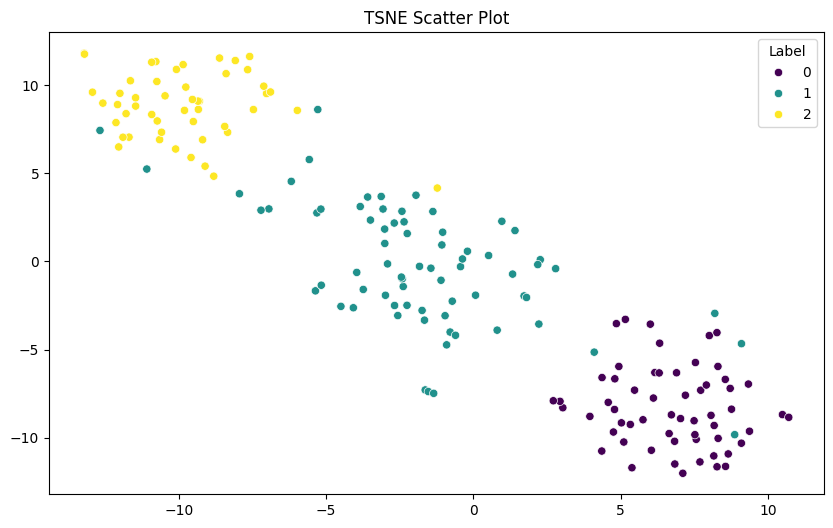

In [35]:
tsne_atan = TSNECreator(atan_scaled_data, perplexity=30, learning_rate=200)
tsne_atan.plot_tsne(wine_data['Label'])
